# Base model for stock prediction

In [1]:
from tools.log_controller import LogController
from pathlib import Path

log_controller = LogController(config_path=Path('config', 'logging_config.json'))
log_controller.start()

 2025-09-10 12:32:50 - data_repository - INFO - Loaded: AAPL
 2025-09-10 12:32:50 - data_repository - INFO - Loaded: IBM
 2025-09-10 12:32:50 - data_repository - INFO - Loaded: AMZN
 2025-09-10 12:32:50 - data_repository - INFO - Loaded periodic stock market data for: {'AAPL', 'IBM', 'AMZN'}


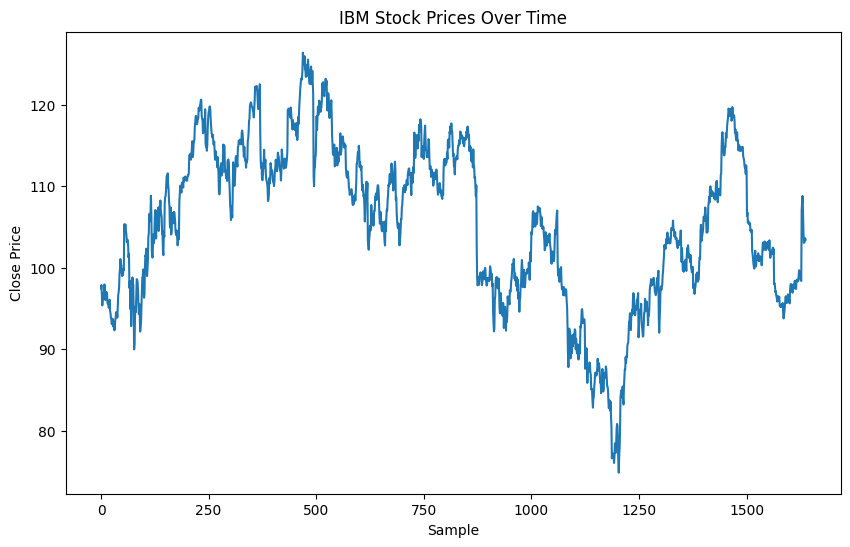

In [ ]:
from core.data_repository import DataRepository
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

data_repository = DataRepository(repo_path=Path('repo'))
AMZN_periodic_data = data_repository.get_dataframes()['AMZN']

plt.figure(figsize=(10, 6))
sns.lineplot(data=AMZN_periodic_data, x=range(len(AMZN_periodic_data)), y='Close')
plt.title('IBM Stock Prices Over Time')
plt.xlabel('Sample')
plt.ylabel('Close Price')
plt.show()

In [3]:
from core.data_preparator import DataPreparator

timesteps_lookback = 5

AMZN_supervised_data = DataPreparator.reformat_periodic_to_supervised_data(
    dataframe=AMZN_periodic_data,
    target_column='Close',
    t=timesteps_lookback
)

AMZN_supervised_data

 2025-09-10 12:32:51 - data_preparator - INFO - Preparing data for target column: Close, with t=5


,Close,Close_0,Close_1,Close_2,Close_3,Close_4
Date,,,,,,
2011-05-09,96.157166,96.037766,95.366699,96.589554,97.863274,97.455727
2011-05-10,96.885056,96.157166,96.037766,95.366699,96.589554,97.863274
2011-05-11,96.384598,96.885056,96.157166,96.037766,95.366699,96.589554
2011-05-12,97.942711,96.384598,96.885056,96.157166,96.037766,95.366699
2011-05-13,96.623444,97.942711,96.384598,96.885056,96.157166,96.037766
...,...,...,...,...,...,...
2017-10-25,103.037476,104.635094,107.098572,108.790131,108.004768,107.085144
2017-10-26,103.104599,103.037476,104.635094,107.098572,108.790131,108.004768
2017-10-27,103.158318,103.104599,103.037476,104.635094,107.098572,108.790131


In [4]:
from core.dataset import StockDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

AMZN_train_dataset, AMZN_test_dataset = train_test_split(AMZN_supervised_data, test_size=0.1, shuffle=False, random_state=42)
AMZN_train_dataset, AMZN_validation_dataset = train_test_split(AMZN_train_dataset, test_size=0.2, shuffle=False, random_state=42)

In [5]:
target = 'Close'
features = [col for col in AMZN_supervised_data.columns if col != target]

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_X.fit(AMZN_train_dataset[features])
scaler_y.fit(AMZN_train_dataset[[target]])

X_train_scaled = scaler_X.transform(AMZN_train_dataset[features])
y_train_scaled = scaler_y.transform(AMZN_train_dataset[[target]])

X_validation_scaled = scaler_X.transform(AMZN_validation_dataset[features])
y_validation_scaled = scaler_y.transform(AMZN_validation_dataset[[target]])

X_test_scaled = scaler_X.transform(AMZN_test_dataset[features])
y_test_scaled = scaler_y.transform(AMZN_test_dataset[[target]])

AMZN_train_scaled = pd.DataFrame(X_train_scaled, columns=features)
AMZN_train_scaled[target] = y_train_scaled

AMZN_validation_scaled = pd.DataFrame(X_validation_scaled, columns=features)
AMZN_validation_scaled[target] = y_validation_scaled

AMZN_test_scaled = pd.DataFrame(X_test_scaled, columns=features)
AMZN_test_scaled[target] = y_test_scaled

AMZN_train_dataset = AMZN_train_scaled
AMZN_validation_dataset = AMZN_validation_scaled
AMZN_test_dataset = AMZN_test_scaled

In [6]:
display(AMZN_train_dataset.shape, AMZN_validation_dataset.shape, AMZN_test_dataset.shape)
display(AMZN_train_dataset.head(), AMZN_validation_dataset.head(), AMZN_test_dataset.head())

(1175, 6)

(294, 6)

(164, 6)

,Close_0,Close_1,Close_2,Close_3,Close_4,Close
0,0.303446,0.288028,0.316123,0.345387,0.336024,0.306189
1,0.306189,0.303446,0.288028,0.316123,0.345387,0.322912
2,0.322912,0.306189,0.303446,0.288028,0.316123,0.311414
3,0.311414,0.322912,0.306189,0.303446,0.288028,0.347212
4,0.347212,0.311414,0.322912,0.306189,0.303446,0.316902


,Close_0,Close_1,Close_2,Close_3,Close_4,Close
0,0.016033,0.049400,0.059222,0.060666,0.084788,-0.001733
1,-0.001733,0.016033,0.049400,0.059222,0.060666,0.021377
2,0.021377,-0.001733,0.016033,0.049400,0.059222,0.016611
3,0.016611,0.021377,-0.001733,0.016033,0.049400,-0.008378
4,-0.008378,0.016611,0.021377,-0.001733,0.016033,0.016756


,Close_0,Close_1,Close_2,Close_3,Close_4,Close
0,0.774737,0.809045,0.823101,0.824459,0.818112,0.784561
1,0.784561,0.774737,0.809045,0.823101,0.824459,0.763856
2,0.763856,0.784561,0.774737,0.809045,0.823101,0.752672
3,0.752672,0.763856,0.784561,0.774737,0.809045,0.754032
4,0.754032,0.752672,0.763856,0.784561,0.774737,0.775645


In [7]:
AMZN_train_dataset = StockDataset(AMZN_train_dataset)
AMZN_validation_dataset = StockDataset(AMZN_validation_dataset)
AMZN_test_dataset = StockDataset(AMZN_test_dataset)

 2025-09-10 12:32:54 - dataset - INFO - Created stock dataset for AMZN, focusing target: Close
 2025-09-10 12:32:54 - dataset - INFO - Created stock dataset for AMZN, focusing target: Close
 2025-09-10 12:32:54 - dataset - INFO - Created stock dataset for AMZN, focusing target: Close


In [8]:
from models.base_model import BaseStockModel

AMZN_base_model = BaseStockModel(
    id='base_amzn_model',
    ticker='AMZN',
    input_dim=1,
    hidden_dim=32,
    layer_dim=1,
    output_dim=1
)

 2025-09-10 12:32:54 - model - INFO - Model(id=base_amzn_model,
ticker=('AMZN',),
input_dimension=1),
hidden_dimension=32,
layer_dimension=1,
output_dimension=1)


In [9]:
from torch.optim import Adam
from torch.nn import MSELoss

optimizer = Adam(AMZN_base_model.parameters(), lr=0.001)
loss_function = MSELoss()

In [10]:
from torch.utils.data import DataLoader
import torch
import numpy as np


AMZN_train_data_loader = DataLoader(AMZN_train_dataset, batch_size=16, shuffle=False)
AMZN_validation_data_loader = DataLoader(AMZN_validation_dataset, batch_size=10, shuffle=False)


train_rmse_list = []
val_rmse_list = []

predictions = []
actuals = []
epochs = 20

for epoch in range(epochs):
    # Training loop
    AMZN_base_model.train()
    train_loss = 0
    for X,y in AMZN_train_data_loader:
        optimizer.zero_grad()
        X, y = X.reshape(-1,timesteps_lookback,1), y.reshape(-1,1) # Adjust for t
        outputs, _ = AMZN_base_model(X)
        loss = loss_function(outputs, y)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        predictions.extend(outputs.detach().numpy().flatten())
        actuals.extend(y.numpy().flatten())
        
    # Validation loop
    AMZN_base_model.eval()
    val_loss = 0
    with torch.no_grad():
        for X,y in AMZN_validation_data_loader:
            X, y = X.reshape(-1,timesteps_lookback,1), y.reshape(-1,1)
            outputs, _ = AMZN_base_model(X)
            val_loss += loss_function(outputs, y).item()
            
    train_rmse = np.sqrt(train_loss / len(AMZN_train_data_loader))
    val_rmse = np.sqrt(val_loss / len(AMZN_validation_data_loader))
    
    train_rmse_list.append(train_rmse)
    val_rmse_list.append(val_rmse)
        
    print(f'Epoch [{epoch+1}/{epochs}]')
    print(f'RMSE: {train_rmse:.4f}')
    print(f'Validation RMSE: {val_rmse:.4f}')

Epoch [1/20]
RMSE: 0.3840
Validation RMSE: 0.2074
Epoch [2/20]
RMSE: 0.2090
Validation RMSE: 0.1925
Epoch [3/20]
RMSE: 0.1832
Validation RMSE: 0.1794
Epoch [4/20]
RMSE: 0.1653
Validation RMSE: 0.1667
Epoch [5/20]
RMSE: 0.1486
Validation RMSE: 0.1537
Epoch [6/20]
RMSE: 0.1323
Validation RMSE: 0.1396
Epoch [7/20]
RMSE: 0.1161
Validation RMSE: 0.1241
Epoch [8/20]
RMSE: 0.1000
Validation RMSE: 0.1072
Epoch [9/20]
RMSE: 0.0839
Validation RMSE: 0.0897
Epoch [10/20]
RMSE: 0.0685
Validation RMSE: 0.0740
Epoch [11/20]
RMSE: 0.0560
Validation RMSE: 0.0614
Epoch [12/20]
RMSE: 0.0486
Validation RMSE: 0.0523
Epoch [13/20]
RMSE: 0.0452
Validation RMSE: 0.0468
Epoch [14/20]
RMSE: 0.0440
Validation RMSE: 0.0440
Epoch [15/20]
RMSE: 0.0436
Validation RMSE: 0.0428
Epoch [16/20]
RMSE: 0.0434
Validation RMSE: 0.0424
Epoch [17/20]
RMSE: 0.0434
Validation RMSE: 0.0424
Epoch [18/20]
RMSE: 0.0434
Validation RMSE: 0.0426
Epoch [19/20]
RMSE: 0.0435
Validation RMSE: 0.0430
Epoch [20/20]
RMSE: 0.0436
Validation RM

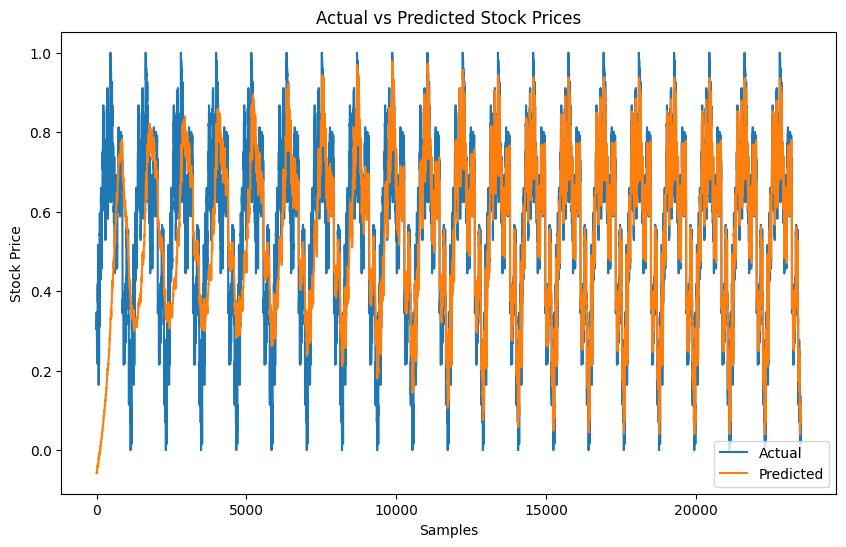

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(actuals)), y=actuals, label='Actual')
sns.lineplot(x=range(len(predictions)), y=predictions, label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

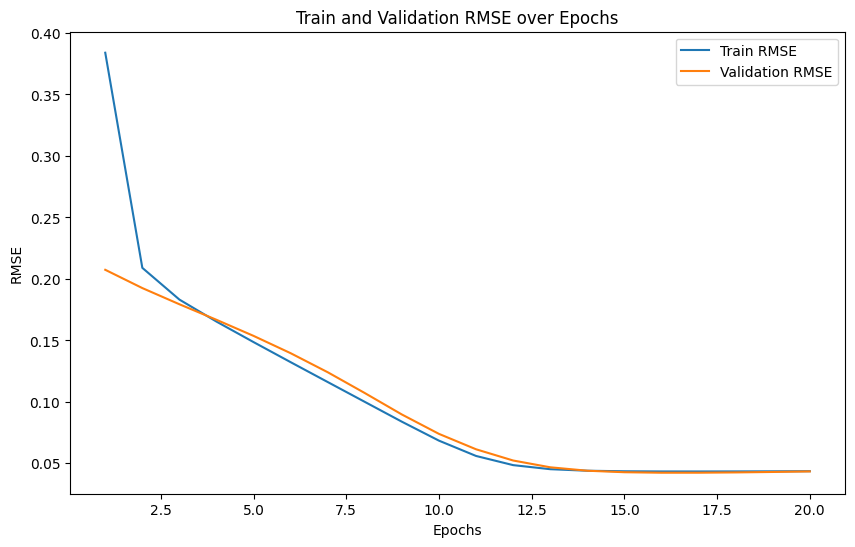

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

epochs_range = range(1, epochs + 1)
plt.figure(figsize=(10, 6))
sns.lineplot(x=epochs_range, y=train_rmse_list, label='Train RMSE')
sns.lineplot(x=epochs_range, y=val_rmse_list, label='Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Train and Validation RMSE over Epochs')
plt.legend()
plt.show()

In [13]:
AMZN_base_model.eval()
AMZN_test_data_loader = DataLoader(AMZN_test_dataset, batch_size=10, shuffle=False)
test_loss = 0

predictions = []
actuals = []

with torch.no_grad():
    for X,y in AMZN_test_data_loader:
        X, y = X.reshape(-1,timesteps_lookback,1), y.reshape(-1,1)
        outputs, _ = AMZN_base_model(X)
        test_loss += loss_function(outputs, y).item()
        predictions.extend(outputs.numpy().flatten())
        actuals.extend(y.numpy().flatten())

test_rmse = np.sqrt(test_loss / len(AMZN_test_data_loader))
print(f'Test RMSE: {test_rmse:.4f}')

Test RMSE: 0.0367


In [14]:
import numpy as np
predictions = scaler_y.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
actuals = scaler_y.inverse_transform(np.array(actuals).reshape(-1, 1)).flatten()

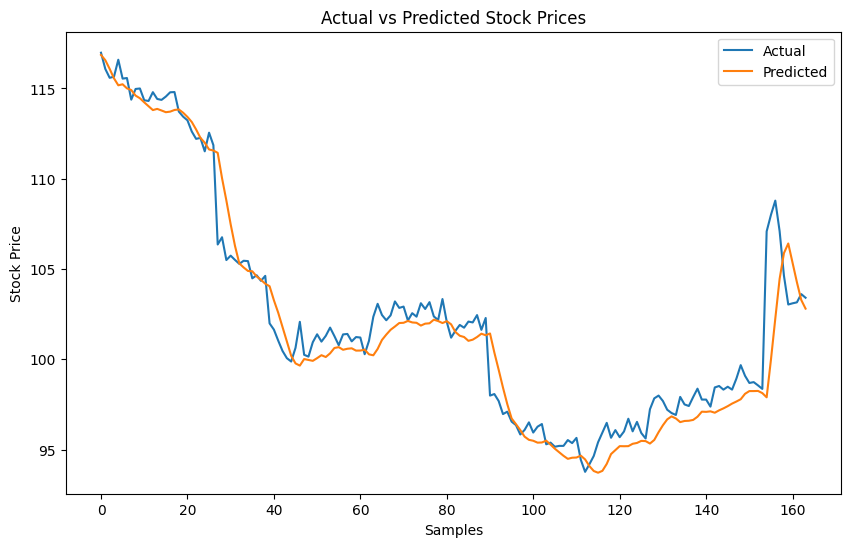

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns




plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(actuals)), y=actuals, label='Actual')
sns.lineplot(x=range(len(predictions)), y=predictions, label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()